<a href="https://colab.research.google.com/github/WolfgangNS/Sequence-Alignment-Viewer/blob/main/RNA_alignment_via_IGV_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequence Alignment Viewer

##### Downloader, SRA aligner, and embedded IGV viewer, all-in-one.
##### Unofficial notebook, courtesy of Wolfgang S.

## 📦🛠️ Installation and setup

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
!conda install -q -c bioconda samtools
!conda install -q -c biobuilds hisat2

!conda install -q -c conda-forge ncbi-datasets-cli
!conda install -q -c bioconda samtools

# TO-DO: compare to bioconda package installation
# https://bioconda.github.io/conda-package_index.html
!conda install -c bioconda igv-notebook

In [ ]:
!mkdir -p /root/tools/ncbi_sra_tools/
!wget -P /root/tools/ncbi_sra_tools/ https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.0.0/sratoolkit.3.0.0-ubuntu64.tar.gz
!tar -C /root/tools/ncbi_sra_tools/ -xzf /root/tools/ncbi_sra_tools/sratoolkit.3.0.0-ubuntu64.tar.gz

import os
os.environ['PATH'] += ":/root/tools/ncbi_sra_tools/sratoolkit.3.0.0-ubuntu64/bin"

In [ ]:
!mkdir -p ~/.ncbi/

In [ ]:
%%writefile ~/.ncbi/user-settings.mkfg
## auto-generated configuration file - DO NOT EDIT ##

/LIBS/GUID = "4aaa9bed-32da-4ac1-9cac-a35318f03659"
/config/default = "false"
/repository/user/ad/public/apps/file/volumes/flatAd = "."
/repository/user/ad/public/apps/refseq/volumes/refseqAd = "."
/repository/user/ad/public/apps/sra/volumes/sraAd = "."
/repository/user/ad/public/apps/sraPileup/volumes/ad = "."
/repository/user/ad/public/apps/sraRealign/volumes/ad = "."
/repository/user/ad/public/apps/wgs/volumes/wgsAd = "."

In [ ]:
# Optional: generate .mkfg file on your own:
# ↓ Run this code below, but just hit `<Enter>`; don't configure anything.
# It should return `Segmentation Fault`, this is normal.

# !vdb-config --interactive-mode textual --interactive
# !vdb-config --interactive

## 📁<sub><small>⭳</small></sub> Data download

In [ ]:
# link to SRA Toolkit guide:
# https://github.com/ncbi/sra-tools/wiki/HowTo:-fasterq-dump
# https://www.ncbi.nlm.nih.gov/sra/docs/sradownload/

In [ ]:
# IGV example:
# https://github.com/igvteam/igv-notebook

In [ ]:
# E. Coli

# SRR reads
# https://www.ncbi.nlm.nih.gov/sra/SRX29279086[accn]
# https://www.ncbi.nlm.nih.gov/sra/SRX29279081[accn]

# Reference genome
# https://www.ncbi.nlm.nih.gov/nuccore/NC_000913.3

# Search query for small file SRR reads:
# ("Escherichia coli"[Organism] OR E. coli[All Fields]) AND "Escherichia coli"[orgn] AND ("platform oxford nanopore"[Properties] AND "cloud gs"[Properties] AND "filetype fastq"[Properties])

In [ ]:
# restart BAM alignment
!rm -rf FASTQ_files
!rm -rf mapped/

In [ ]:
!time fasterq-dump SRR34090825 -O FASTQ_files/

In [ ]:
# 0:30
!datasets download genome accession GCF_000005845.2 --include gff3,rna,cds,protein,genome,seq-report
#Do I need all of these to properly display BAM alignment later?

!unzip ncbi_dataset.zip

In [ ]:
# 18:15 to 21:06 run time

!hisat2-build -p 2 \
'/content/ncbi_dataset/data/GCF_000005845.2/GCF_000005845.2_ASM584v2_genomic.fna' \
'/content/ncbi_dataset/data/GCF_000005845.2/genome' #output file name

In [ ]:
# 17:27
!mkdir -p mapped

#not sure why it has the '_1' and '_2'
!hisat2 -p 2 \
-x ./ncbi_dataset/data/GCF_000005845.2/genome \
-U ./FASTQ_files/SRR34090825.fastq \
| samtools view -Sb -o ./mapped/EColi_sample1.bam

# 4:25
!samtools sort \
./mapped/EColi_sample1.bam \
-o ./mapped/EColi_sample1.sort.bam

!samtools index \
-c ./mapped/EColi_sample1.sort.bam \
./mapped/EColi_sample1.sort.bam.bai

!samtools faidx \
'/content/ncbi_dataset/data/GCF_000005845.2/GCF_000005845.2_ASM584v2_genomic.fna'

## File summary

In [19]:
!printf ".fna file:\n" && \
head "/content/ncbi_dataset/data/GCF_000005845.2/GCF_000005845.2_ASM584v2_genomic.fna" && \
printf "\n\n.fna.fai file:" && \
head "/content/ncbi_dataset/data/GCF_000005845.2/GCF_000005845.2_ASM584v2_genomic.fna.fai" && \
printf "\n\n.bam file:\n" && \
head "/content/mapped/EColi_sample1.bam" && \
printf "\n\n.sort.bam file:\n" && \
head "/content/mapped/EColi_sample1.sort.bam" && \
printf "\n\n.sort.bam.bai file:\n" && \
head "/content/mapped/EColi_sample1.sort.bam.bai" && \
\
printf "\n\n.gff file:\n" && \
head "/content/ncbi_dataset/data/GCF_000005845.2/genomic.gff" && \
printf "\n\n.fastq file:\n" && \
head "/content/FASTQ_files/SRR34090825.fastq" && \
printf "\n\nht2 file:\n" && \
head "/content/ncbi_dataset/data/GCF_000005845.2/genome.1.ht2"

.fna file:
>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTG
GTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGAC
AGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGT
AACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGG
TAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCG
ATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTG
GCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTT
GACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAA
AACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAA


.fna.fai file:NC_000913.3	4641652	72	80	81


.bam file:
�     � BC $M��n�0��ԇ�r���	)i������8�%�)v��g_��
?�f��Y:�!��1*އs|�=��b����Ȥ8�P�=�:ރ�iQA`(�? �*EQ3�47x�x'#!���

(To-do? Generate TPM matrix output)

Also to-do: learn to align SNP's

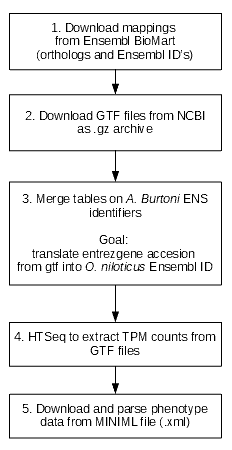

## 🖥️🧬 Display via IGV

In [ ]:
# https://notebooks.gesis.org/binder/jupyter/user/igvteam-igv-notebook-5ezpa167/tree/examples
# https://notebooks.gesis.org/binder/jupyter/user/igvteam-igv-notebook-5ezpa167/notebooks/examples/Colab.ipynb
import igv_notebook

igv_notebook.init()

b = igv_notebook.Browser(
    {
        "reference": {
            "id": "GCF_000239415.1",
            "name": "E_Coli",
            "fastaPath": "/content/ncbi_dataset/data/GCF_000005845.2/GCF_000005845.2_ASM584v2_genomic.fna",
            "indexPath": "/content/ncbi_dataset/data/GCF_000005845.2/GCF_000005845.2_ASM584v2_genomic.fna.fai",
            "tracks": [{
                "name": "Local BAM",
                "path": "/content/mapped/EColi_sample1.sort.bam",
                "indexPath": "/content/mapped/EColi_sample1.sort.bam.bai",
                "format": "bam",
                "type": "alignment",
                # "color": "rgba(94,255,1,0.25)",
                "height": "200"
            }]
        },
        #"locus": "NC_000913.3:442,261-460,391"
        "locus": "NC_000913.3:98,215-116,346"
    }
)

<style>
  #igv-container {
    background-color: #1e1e1e;  /* dark background */
    color: white;  /* text */
    border: 1px solid #444;
  }
</style>
<div id="igv-container"></div>

## 🖥️📈 Display via pyGenomeTracks

(does not work yet)

In [ ]:
!conda install -c conda-forge -c bioconda pygenometracks
# Alternatively,
# !pip install pyGenomeTracks

In [ ]:
!apt list | grep -e bedtools -e samtools

In [ ]:
%%writefile tracks.ini
[spacer]
height = 0.5

[coverage]
file = "/content/mapped/EColi_sample1.sort.bam"
title = RNA coverage
height = 5
color = blue
file_type = bam
show_legend = True
number_of_bins = 700


In [ ]:
# NC_000913.3:1-4,641,652
!pyGenomeTracks --tracks tracks.ini --region chr1:0-4000000 --outFileName output.png